<a href="https://colab.research.google.com/github/jeetedaniel/Old-Car-Price-Prediction-Using-Machine-Learning/blob/main/OldCarPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Reading the csv file
df = pd.read_csv('/content/car_price.csv')

In [ ]:
#viewing first 5 records
df.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


In [ ]:
#Geting the shape of the file
df.shape


(5512, 10)

In [ ]:
#Getting the types of data in the file
df.dtypes

Unnamed: 0              int64
car_name               object
car_prices_in_rupee    object
kms_driven             object
fuel_type              object
transmission           object
ownership              object
manufacture             int64
engine                 object
Seats                  object
dtype: object

Data Cleaning


In [ ]:
#modifying values in car_price column
df['car_prices_in_rupee'] = df['car_prices_in_rupee'].str.replace(',','')

def convert_price(price):
  if 'Lakh' in price:
    return int(float(price.split()[0])*100000)
  elif 'Crore' in price:
    return int(float(price.split()[0])*10000000)
  else:
    return int(price)

df['car_prices_in_rupee'] = df['car_prices_in_rupee'].apply(convert_price)

#printing head to check if changes were made
df.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,1002999,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,1283000,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,1639999,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,777000,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,515000,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


In [ ]:
#renaming engine column
df.rename(columns={'engine':'engine_cc'},inplace=True)

df.head()


,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine_cc,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,1002999,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,1283000,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,1639999,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,777000,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,515000,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


In [ ]:
#Getting the different values of the columns
df['ownership'].value_counts()

ownership
1st Owner    3736
2nd Owner    1314
3rd Owner     359
4th Owner      84
5th Owner      12
0th Owner       7
Name: count, dtype: int64

In [ ]:
#removing unwanted part of the column
df['ownership'] = df['ownership'].str.replace('st Owner','')
df['ownership'] = df['ownership'].str.replace('nd Owner','')
df['ownership'] = df['ownership'].str.replace('rd Owner','')
df['ownership'] = df['ownership'].str.replace('th Owner','')

df.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine_cc,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,1002999,"86,226 kms",Diesel,Manual,1,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,1283000,"13,248 kms",Petrol,Automatic,1,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,1639999,"60,343 kms",Petrol,Automatic,1,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,777000,"26,696 kms",Petrol,Automatic,1,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,515000,"69,414 kms",Petrol,Manual,1,2016,1199 cc,5 Seats


In [ ]:
#kms_driven column
df['kms_driven'].value_counts()

kms_driven
80,000 kms      163
1,20,000 kms    146
60,000 kms      142
50,000 kms      136
70,000 kms      132
               ... 
79,385 kms        1
51,242 kms        1
38,733 kms        1
77,385 kms        1
85,002 kms        1
Name: count, Length: 2610, dtype: int64

In [ ]:
#replacing kms
df['kms_driven']= df['kms_driven'].str.replace('kms','')
df['kms_driven']= df['kms_driven'].str.replace(',','')

df.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine_cc,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,1002999,86226,Diesel,Manual,1,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,1283000,13248,Petrol,Automatic,1,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,1639999,60343,Petrol,Automatic,1,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,777000,26696,Petrol,Automatic,1,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,515000,69414,Petrol,Manual,1,2016,1199 cc,5 Seats


In [ ]:
#engine_cc column
df['engine_cc'].value_counts()

engine_cc
1197 cc    714
1248 cc    395
998 cc     346
1498 cc    252
1497 cc    245
          ... 
1173 cc      1
2359 cc      1
5950 cc      1
3956 cc      1
2979 cc      1
Name: count, Length: 139, dtype: int64

In [ ]:
#modifying the column
df['engine_cc'] = df['engine_cc'].str.replace('cc','')

df.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine_cc,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,1002999,86226,Diesel,Manual,1,2017,1956,5 Seats
1,1,Renault Duster RXZ Turbo CVT,1283000,13248,Petrol,Automatic,1,2021,1330,5 Seats
2,2,Toyota Camry 2.5 G,1639999,60343,Petrol,Automatic,1,2016,2494,5 Seats
3,3,Honda Jazz VX CVT,777000,26696,Petrol,Automatic,1,2018,1199,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,515000,69414,Petrol,Manual,1,2016,1199,5 Seats


In [ ]:
#Seats column
df['Seats'].value_counts()

Seats
5 Seats    4673
7 Seats     631
4 Seats      88
6 Seats      61
8 Seats      54
2 Seats       5
Name: count, dtype: int64

In [ ]:
#modifying Seats Column
df['Seats'] = df['Seats'].str.replace('Seats','')

df.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine_cc,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,1002999,86226,Diesel,Manual,1,2017,1956,5
1,1,Renault Duster RXZ Turbo CVT,1283000,13248,Petrol,Automatic,1,2021,1330,5
2,2,Toyota Camry 2.5 G,1639999,60343,Petrol,Automatic,1,2016,2494,5
3,3,Honda Jazz VX CVT,777000,26696,Petrol,Automatic,1,2018,1199,5
4,4,Volkswagen Polo 1.2 MPI Highline,515000,69414,Petrol,Manual,1,2016,1199,5


In [ ]:
# changing data types

df['kms_driven'] = df['kms_driven'].astype(float)
df['engine_cc'] = df['engine_cc'].astype(float)
df['Seats'] = df['Seats'].astype(int)
df['ownership'] = df['ownership'].astype(int)

df.dtypes

Unnamed: 0               int64
car_name                object
car_prices_in_rupee      int64
kms_driven             float64
fuel_type               object
transmission            object
ownership                int64
manufacture              int64
engine_cc              float64
Seats                    int64
dtype: object

In [ ]:
df.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine_cc,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,1002999,86226.0,Diesel,Manual,1,2017,1956.0,5
1,1,Renault Duster RXZ Turbo CVT,1283000,13248.0,Petrol,Automatic,1,2021,1330.0,5
2,2,Toyota Camry 2.5 G,1639999,60343.0,Petrol,Automatic,1,2016,2494.0,5
3,3,Honda Jazz VX CVT,777000,26696.0,Petrol,Automatic,1,2018,1199.0,5
4,4,Volkswagen Polo 1.2 MPI Highline,515000,69414.0,Petrol,Manual,1,2016,1199.0,5


In [ ]:
#Getting statisticalinfo of data
df.describe()

,Unnamed: 0,car_prices_in_rupee,kms_driven,ownership,manufacture,engine_cc,Seats
count,5512.000000,5.512000e+03,5512.000000,5512.000000,5512.000000,5512.000000,5512.000000
mean,2755.500000,1.162510e+06,63211.888062,1.421807,2015.455552,1532.299710,5.250726
std,1591.321673,1.969919e+06,41844.131167,0.703092,3.927974,579.210876,0.720075
min,0.000000,3.500000e+04,250.000000,0.000000,1995.000000,0.000000,2.000000
25%,1377.750000,3.150000e+05,33151.750000,1.000000,2013.000000,1197.000000,5.000000
50%,2755.500000,5.500000e+05,59000.000000,1.000000,2016.000000,1396.000000,5.000000
75%,4133.250000,1.025750e+06,84265.250000,2.000000,2018.000000,1950.000000,5.000000
max,5511.000000,1.920000e+07,560000.000000,5.000000,2022.000000,5950.000000,8.000000


In [ ]:
#Getting info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           5512 non-null   int64  
 1   car_name             5512 non-null   object 
 2   car_prices_in_rupee  5512 non-null   int64  
 3   kms_driven           5512 non-null   float64
 4   fuel_type            5512 non-null   object 
 5   transmission         5512 non-null   object 
 6   ownership            5512 non-null   int64  
 7   manufacture          5512 non-null   int64  
 8   engine_cc            5512 non-null   float64
 9   Seats                5512 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 430.8+ KB


In [ ]:
#checking for null values
df.isnull().sum()

Unnamed: 0             0
car_name               0
car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
ownership              0
manufacture            0
engine_cc              0
Seats                  0
dtype: int64

Explorative Data Analysis

In [ ]:
df_copy = df.copy()
df_clone = df.copy()

In [ ]:
#taking steps to decrease the variability in the kms_driven

bins_kms_driven=[0,50000,100000,150000,200000,250000,300000,350000,400000,450000,
                 500000,550000,600000]

labels_kms_driven=['0-50k','50k-100k','100k-150k','150k-200k','200k-250k','250k-300k',
                   '300k-350k','350k-400k','400k-450k','450k-500k','500k-550k','550k-600k']


df['kms_driven']=pd.cut(df['kms_driven'],bins=bins_kms_driven,labels=labels_kms_driven)

In [ ]:
#printing the data to check if changes where made
df.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine_cc,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,1002999,50k-100k,Diesel,Manual,1,2017,1956.0,5
1,1,Renault Duster RXZ Turbo CVT,1283000,0-50k,Petrol,Automatic,1,2021,1330.0,5
2,2,Toyota Camry 2.5 G,1639999,50k-100k,Petrol,Automatic,1,2016,2494.0,5
3,3,Honda Jazz VX CVT,777000,0-50k,Petrol,Automatic,1,2018,1199.0,5
4,4,Volkswagen Polo 1.2 MPI Highline,515000,50k-100k,Petrol,Manual,1,2016,1199.0,5


In [ ]:
#Taking steps to reduce variations in the engine_cc

bins_engine_cc=[0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000]

labels_engine_cc=['0-500','500-1000','1000-1500','1500-2000','2000-2500','2500-3000',
                  '3000-3500','3500-4000','4000-4500','4500-5000','5000-5500','5500-6000']

df['engine_cc']=pd.cut(df['engine_cc'],bins=bins_engine_cc,labels=labels_engine_cc)


In [ ]:
#Checking if changes were made
df.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine_cc,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,1002999,50k-100k,Diesel,Manual,1,2017,1500-2000,5
1,1,Renault Duster RXZ Turbo CVT,1283000,0-50k,Petrol,Automatic,1,2021,1000-1500,5
2,2,Toyota Camry 2.5 G,1639999,50k-100k,Petrol,Automatic,1,2016,2000-2500,5
3,3,Honda Jazz VX CVT,777000,0-50k,Petrol,Automatic,1,2018,1000-1500,5
4,4,Volkswagen Polo 1.2 MPI Highline,515000,50k-100k,Petrol,Manual,1,2016,1000-1500,5


Analyse relation of each independant variable with dependant variable

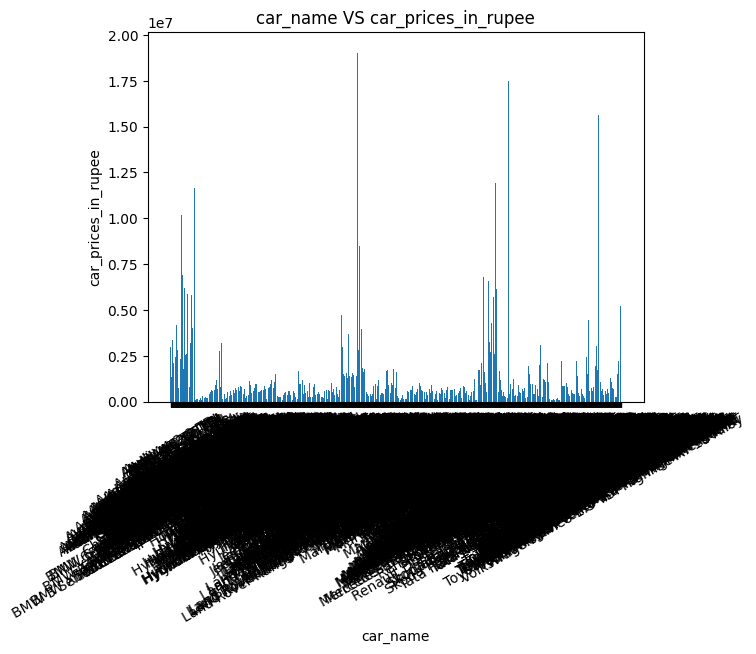

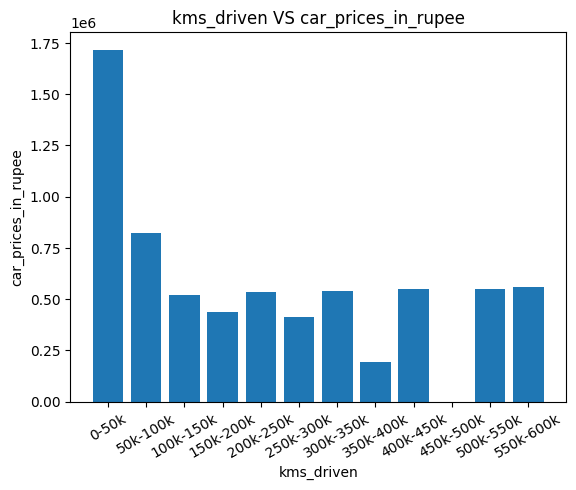

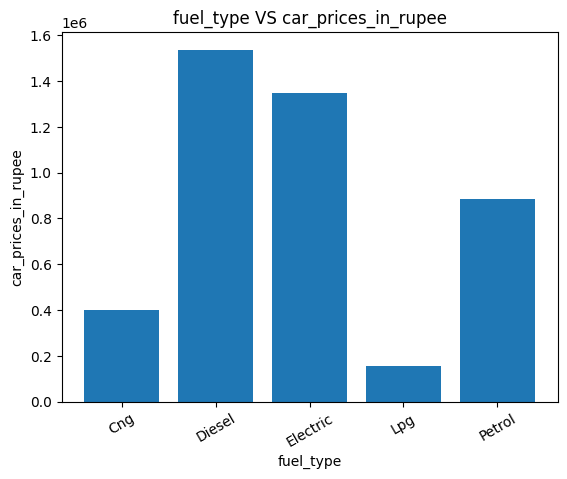

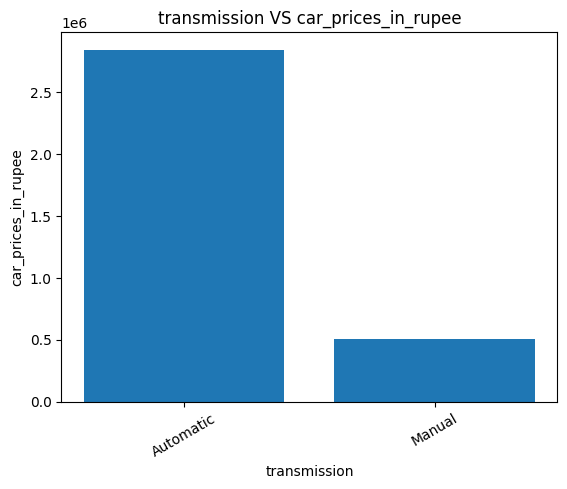

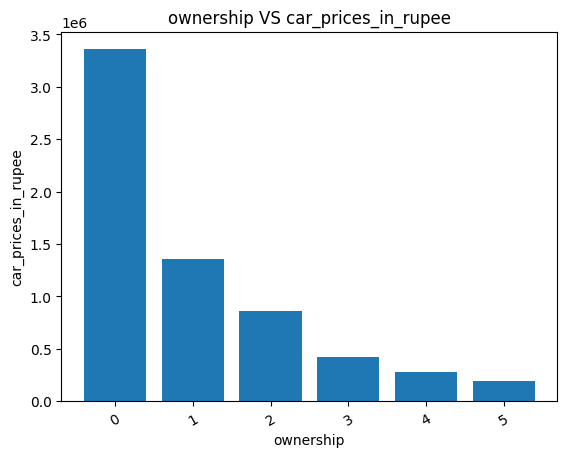

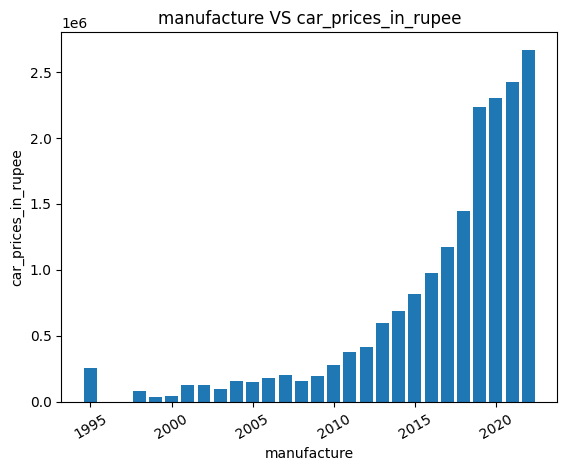

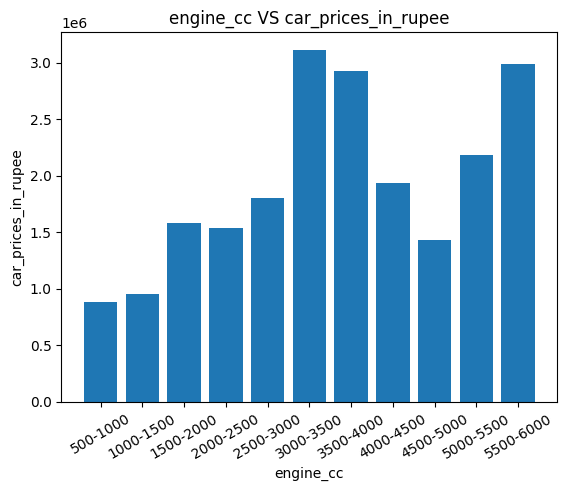

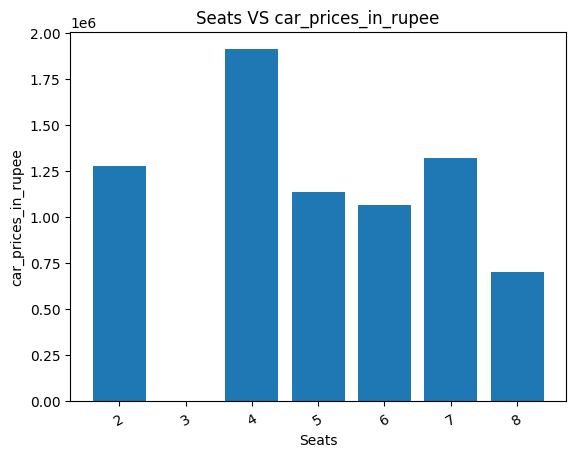

In [ ]:
#Plot each column of df VS df['car_prices_in_rupee'] and analyse the results
columns=['car_name', 'kms_driven', 'fuel_type', 'transmission',
       'ownership', 'manufacture','engine_cc', 'Seats']
for i in columns:
    group_df=df.groupby(i)['car_prices_in_rupee'].mean()
    plt.bar(group_df.index,group_df.values)
    plt.xlabel(f'{i}')
    plt.ylabel('car_prices_in_rupee')
    plt.title(f'{i} VS car_prices_in_rupee')
    plt.xticks(rotation=30)
    plt.show()

From above data we can say that

1)Lesser value of kms driven gives higher car price

2)electric and diesel cars are costlier than cng and lpg cars

3)automatic car har more price than manual

4)As number of owner increases, price decreases

5)cars having latest year of manufacture have more price

6)engine with more CC capacity has higher price

5)4 seats car have more price

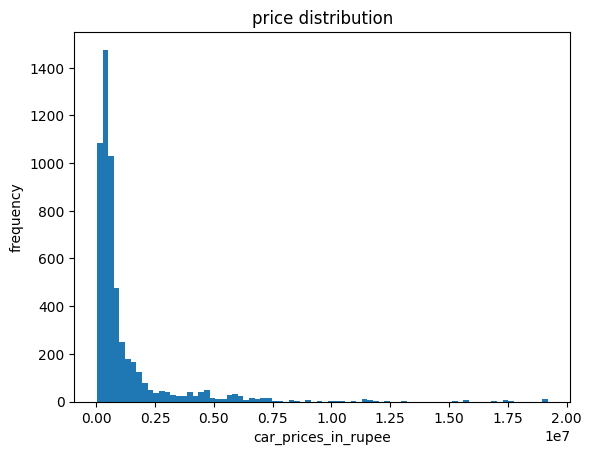

In [ ]:
plt.hist(df['car_prices_in_rupee'],bins=80)
plt.xlabel('car_prices_in_rupee')
plt.ylabel('frequency')
plt.title('price distribution')
plt.show()

In [ ]:
#finding the top 5 most expensive cars
most_expensive_cars = df_clone.sort_values(by='car_prices_in_rupee',ascending=False)
most_expensive_cars = most_expensive_cars.drop_duplicates(subset='car_name')
most_expensive_cars=most_expensive_cars.loc[:,['car_name','car_prices_in_rupee']]
print('most_expensive_cars\n',most_expensive_cars.head().to_string())

most_expensive_cars
                                                  car_name  car_prices_in_rupee
5406     Land Rover Range Rover 3.0 Petrol LWB Vogue BSIV             19200000
3025  Land Rover Range Rover 4.4 Diesel LWB Autobiography             19000000
3157                         Mercedes-Benz S-Class S 350d             17700000
2911                                    Audi RS7 4.0 TFSI             17500000
5483                                 Porsche Panamera GTS             17500000


In [ ]:
#finding the 5 most cheapest cars
most_cheaper_cars = df_clone.sort_values(by='car_prices_in_rupee')
most_cheaper_cars = most_cheaper_cars.drop_duplicates(subset='car_name')
most_cheaper_cars=most_cheaper_cars.loc[:,['car_name','car_prices_in_rupee']]
print('most_cheaper_cars\n',most_cheaper_cars.head().to_string())

most_cheaper_cars
                    car_name  car_prices_in_rupee
3336         Maruti 800 Std                35000
4668           Tata Nano Lx                35000
4948      Tata Nano Lx BSIV                35000
957          Maruti Zen LXI                39000
2204  Maruti 800 DX 5 Speed                40000


Correlation Analysis

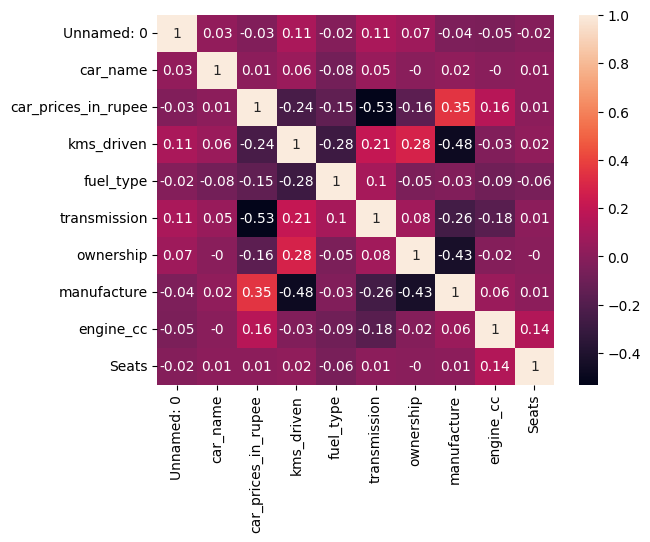

In [ ]:
#Label encoding for correlation matrix

df_copy.car_name=LabelEncoder().fit_transform(df_clone.car_name)
df_copy.fuel_type=LabelEncoder().fit_transform(df_clone.fuel_type)
df_copy.transmission=LabelEncoder().fit_transform(df_clone.transmission)
sns.heatmap(data=df_copy.corr().round(2),annot=True)
plt.show()

Machine Learning

In [ ]:
df_clone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           5512 non-null   int64  
 1   car_name             5512 non-null   object 
 2   car_prices_in_rupee  5512 non-null   int64  
 3   kms_driven           5512 non-null   float64
 4   fuel_type            5512 non-null   object 
 5   transmission         5512 non-null   object 
 6   ownership            5512 non-null   int64  
 7   manufacture          5512 non-null   int64  
 8   engine_cc            5512 non-null   float64
 9   Seats                5512 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 430.8+ KB


In [ ]:
#One hot encoding for machine learning
categorical_columns=['car_name', 'fuel_type', 'transmission',]
numerical_columns=[ 'kms_driven','ownership', 'manufacture','engine_cc', 'Seats','car_prices_in_rupee']
one_hot_encoder=OneHotEncoder(drop='first')
one_hot_encoded=one_hot_encoder.fit_transform(df_clone[categorical_columns])
one_hot_encoded_dense=one_hot_encoded.toarray()
df_one_hot_encoded=pd.DataFrame(one_hot_encoded_dense,columns=one_hot_encoder.get_feature_names_out())
df_combined=pd.concat([df_one_hot_encoded,df_clone[numerical_columns]],axis=1)

In [ ]:
#Standardization of feature columns
x1=df_combined.drop(columns='car_prices_in_rupee',axis=1)
y=df_combined['car_prices_in_rupee']
scaler=StandardScaler()
x=scaler.fit_transform(x1)

In [ ]:
#Splitting data into training, validation and test data
x_train_val,x_test,y_train_val,y_test=train_test_split(x,y,test_size=0.15,random_state=22)
x_train,x_val,y_train,y_val=train_test_split(x_train_val,y_train_val,test_size=0.15,random_state=2)

Model Selection

In [ ]:
#Applying first model
model1=LinearRegression()
model1.fit(x_train,y_train)
y_pred1_train=model1.predict(x_train)
r2_linear_train=r2_score(y_train,y_pred1_train)
print('r2_linear_train=',r2_linear_train.round(3))
y_pred1_val=model1.predict(x_val)
r2_linear_val=r2_score(y_val,y_pred1_val)
print('r2_linear_val=',r2_linear_val.round(3))

r2_linear_train= 0.959
r2_linear_val= -1.4835106883951766e+28


In [ ]:
#Apply second model
model2=xgb.XGBRegressor()
model2.fit(x_train,y_train)
y_pred2_train=model2.predict(x_train)
r2_xgb_train=r2_score(y_train,y_pred2_train)
print('r2_xgb_train=',r2_xgb_train.round(3))
y_pred2_val=model2.predict(x_val)
r2_xgb_val=r2_score(y_val,y_pred2_val)
print('r2_xgb_val=',r2_xgb_val.round(3))

r2_xgb_train= 0.948
r2_xgb_val= 0.833


As XGBoost model is giving more value of r2 for both training and validation dataset, we will select XGBoost model on test data

In [ ]:
y_pred2_test=model2.predict(x_test)
r2_xgb_test=r2_score(y_test,y_pred2_test)
print('r2_xgb_test=',r2_xgb_test.round(3))

r2_xgb_test= 0.901


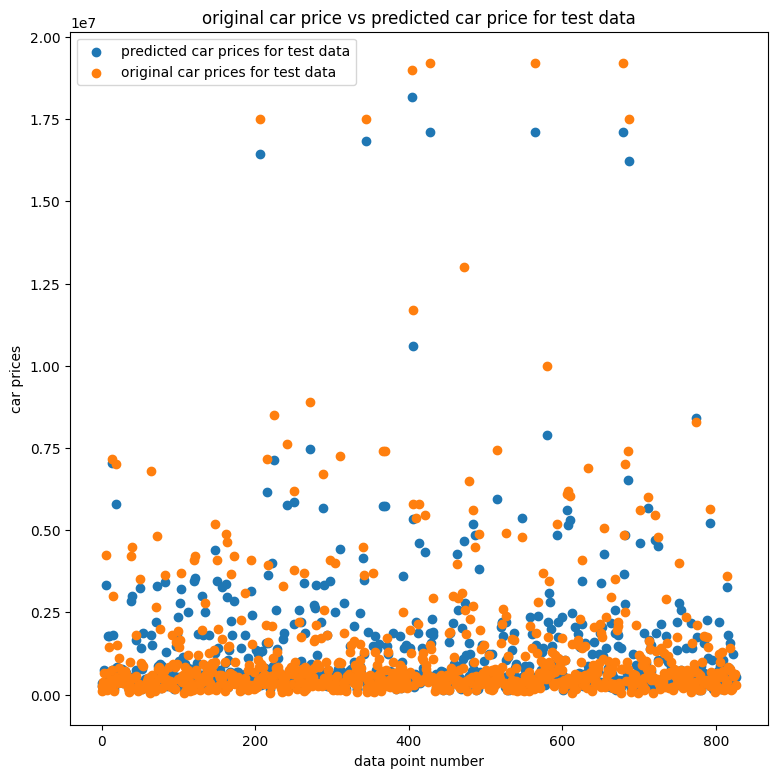

In [ ]:
plt.figure(figsize=(9,9))
plt.scatter(range(len(y_pred2_test)),y_pred2_test,label='predicted car prices for test data')
plt.scatter(range(len(y_test)),y_test,label='original car prices for test data')
plt.title('original car price vs predicted car price for test data')
plt.xlabel('data point number')
plt.ylabel('car prices')
plt.legend()
plt.show()

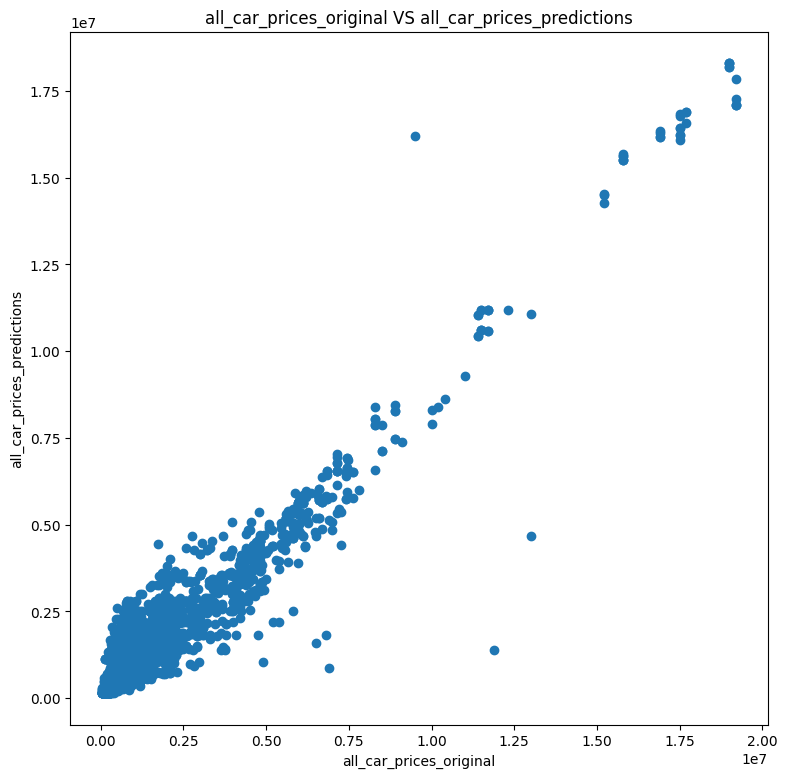

In [ ]:
all_car_prices_predictions=np.concatenate([y_pred2_train,y_pred2_val,y_pred2_test])
all_car_prices_original=np.concatenate([y_train,y_val,y_test])
plt.figure(figsize=(9,9))
plt.scatter(all_car_prices_original,all_car_prices_predictions)
plt.title('all_car_prices_original VS all_car_prices_predictions')
plt.xlabel('all_car_prices_original')
plt.ylabel('all_car_prices_predictions')
plt.show()